# Injection-recovery test ($\Delta\log_{10}\text{BF}$ Vs $e_0$)

In [2]:
import numpy as np
import bilby
import gwpy
import corner
import h5py
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, interp1d
from scipy.optimize import fsolve

## Fetching data 


In [3]:
# TaylorF2Ecck 
# e0=0.01
result = bilby.result.read_in_result("../injection_recover_PE_results/GW190425_Ecck_e0_0p01_data0_1126259642-413_analysis_H1L1_result.hdf5")
ecck_0p01 = result.log_10_bayes_factor
# e0=0.05
result = bilby.result.read_in_result("../injection_recover_PE_results/GW190425_Ecck_e0_0p05_data0_1126259642-413_analysis_H1L1_result.hdf5")
ecck_0p05 = result.log_10_bayes_factor
# e0=0.07
result = bilby.result.read_in_result("../injection_recover_PE_results/GW190425_Ecck_e0_0p07_data0_1126259642-413_analysis_H1L1_result.hdf5")
ecck_0p07 = result.log_10_bayes_factor
# e0=0.10
result = bilby.result.read_in_result("../injection_recover_PE_results/GW190425_Ecck_e0_0p1_data0_1126259642-413_analysis_H1L1_result.hdf5")
ecck_0p10 = result.log_10_bayes_factor

# TaylorF2
# e0=0.01
result = bilby.result.read_in_result("../injection_recover_PE_results/GW190425_TF2_e0_0p01_data0_1126259642-413_analysis_H1L1_result.hdf5")
tf2_0p01 = result.log_10_bayes_factor
# e0=0.05
result = bilby.result.read_in_result("../injection_recover_PE_results/GW190425_TF2_e0_0p05_data0_1126259642-413_analysis_H1L1_result.hdf5")
tf2_0p05 = result.log_10_bayes_factor
# e0=0.07
result = bilby.result.read_in_result("../injection_recover_PE_results/GW190425_TF2_e0_0p07_data0_1126259642-413_analysis_H1L1_result.hdf5")
tf2_0p07 = result.log_10_bayes_factor
# e0=0.10
result = bilby.result.read_in_result("../injection_recover_PE_results/GW190425_TF2_e0_0p1_data0_1126259642-413_analysis_H1L1_result.hdf5")
tf2_0p1 = result.log_10_bayes_factor

In [4]:
# TaylorF2Ecck vs TaylorF2
bf_tf2 = np.array([ecck_0p01-tf2_0p01, ecck_0p05-tf2_0p05, ecck_0p07-tf2_0p07, ecck_0p10-tf2_0p1])
e0_tf2 = np.array([0.01, 0.05, 0.07, 0.1])
bf_tf2, e0_tf2

(array([-1.41015944, 26.73102795, 41.19590248, 57.85762289]),
 array([0.01, 0.05, 0.07, 0.1 ]))

In [5]:
# curve fitting
# fit spline
# TaylorF2Ecck vs TaylorF2
cs_tf2 = CubicSpline(e0_tf2, bf_tf2, extrapolate=True)
e0_spline_tf2 = fsolve(lambda x: cs_tf2(x) - 2, 0.05)[0]
print(f"e0 spline at bf = 2: {e0_spline_tf2}")

e0 spline at bf = 2: 0.015541722694762264


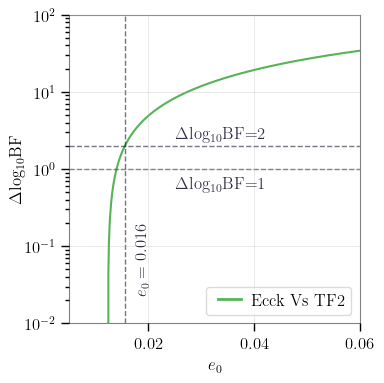

In [7]:
e0_array2 = np.geomspace(0.001, 0.06, 500)

# Setup the figure
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 12
})
plt.figure(figsize=(4, 4))
plt.plot(e0_array2, cs_tf2(e0_array2), label='Ecck Vs TF2', color='C2', alpha=0.8)

# Labeling the first plot
plt.xlabel(r"$e_0$", fontdict={'fontsize': 12})
plt.ylabel(r'$\Delta$log$_{10}{\rm BF}$', labelpad=0, fontdict={'fontsize': 12})

legend = plt.legend(handlelength=2, loc='lower right', bbox_to_anchor=(1.0, 0.0), frameon=True, fontsize=12, edgecolor='lightgray')
# # rounded box for legend
legend.get_frame().set_boxstyle('Round', pad=0.0, rounding_size=0.2)
# Modify line width for legend entries
for handle in legend.get_lines():
    handle.set_linewidth(2)
    handle.set_alpha(0.8)

# horizontal lines
plt.axhline(y=2.0, color='#1B1833', linestyle='--', linewidth=1, alpha=0.6)
plt.text(0.025, 2.0+0.5, r'$\Delta$log$_{10}$BF=2', color='#1B1833', fontsize=12, alpha=0.9)
plt.axhline(y=1.0, color='#1B1833', linestyle='--', linewidth=1, alpha=0.6)
plt.text(0.025, 1.0-0.45, r'$\Delta$log$_{10}$BF=1', color='#1B1833', fontsize=12, alpha=0.9)

# vertical lines
plt.axvline(x=e0_spline_tf2, color='#1B1833', linestyle='--', linewidth=1, alpha=0.6)
plt.text(e0_spline_tf2+0.002, 0.025, rf'$e_0={e0_spline_tf2:.3f}$', color='#1B1833', fontsize=12, alpha=0.9, rotation=90)

plt.xlim(0.005, 0.06)
plt.ylim(0.01, 100.0)
plt.yscale('log')

plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.savefig('./bf_vs_eccn_tf2_GW190425.pdf')
plt.show()